In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the dataset
df = pd.read_csv('PYPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,35.130001,36.259998,30.520000,36.139999,36.139999,205399700
1,2016-02-01,35.650002,38.930000,31.639999,38.139999,38.139999,248604000
2,2016-03-01,38.520000,41.750000,37.000000,38.599998,38.599998,189313600
3,2016-04-01,38.509998,41.490002,37.340000,39.180000,39.180000,154169300
4,2016-05-01,39.070000,40.313999,37.310001,37.790001,37.790001,176555100
...,...,...,...,...,...,...,...
92,2023-09-01,63.130001,65.730003,56.529999,58.459999,58.459999,264905000
93,2023-10-01,58.619999,59.639999,50.250000,51.799999,51.799999,311679500
94,2023-11-01,51.910000,60.200001,51.095001,57.610001,57.610001,342003200
95,2023-12-01,57.630001,64.129997,57.320000,61.410000,61.410000,334731700


In [56]:
#Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       97 non-null     object 
 1   Open       97 non-null     float64
 2   High       97 non-null     float64
 3   Low        97 non-null     float64
 4   Close      97 non-null     float64
 5   Adj Close  97 non-null     float64
 6   Volume     97 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.4+ KB


In [57]:
#Check for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

• No null values

In [58]:
#Shape of the df dataset
df.shape

(97, 7)

In [59]:
#Columns in the df dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [60]:
#Dropping unnecessary columns as time series analysis only requires date column and stock price column
df1 = df.drop(columns=['Open','High','Low','Close','Volume'])
df1

,Date,Adj Close
0,2016-01-01,36.139999
1,2016-02-01,38.139999
2,2016-03-01,38.599998
3,2016-04-01,39.180000
4,2016-05-01,37.790001
...,...,...
92,2023-09-01,58.459999
93,2023-10-01,51.799999
94,2023-11-01,57.610001
95,2023-12-01,61.410000


In [61]:
#Convert Date column to datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

In [62]:
#Date column changed to datetime type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       97 non-null     datetime64[ns]
 1   Adj Close  97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [63]:
#Set Date column as index column
df1.set_index('Date',inplace=True)

In [64]:
#Dataset has Date column as index colum
df1.head()

,Adj Close
Date,
2016-01-01,36.139999
2016-02-01,38.139999
2016-03-01,38.599998
2016-04-01,39.180000
2016-05-01,37.790001


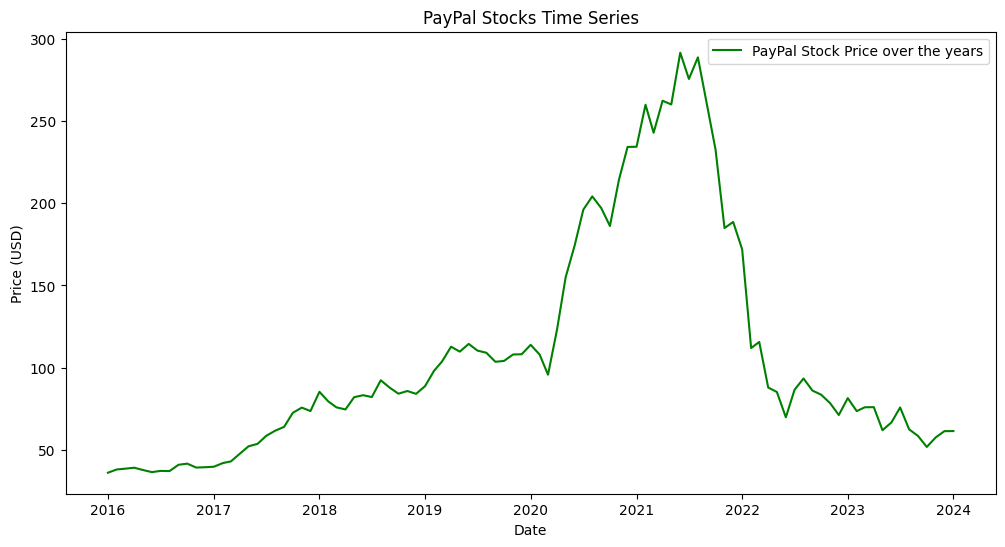

In [65]:
#Plotting Original Pay Pal Stocks Time Series
plt.figure(figsize=(12,6))
plt.plot(df1.index,df1['Adj Close'],label='PayPal Stock Price over the years',color='g')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('PayPal Stocks Time Series')
plt.legend()
plt.show()

• As per the graph, there is a steady increase in stock prices since 2016 and then in 2020 there is significant rise in stock prices that continues till middle of 2021.

• There is a peak in stock prices in the middle of the year 2021.

• There is a decline ever since the middle of the year of 2021.

In [66]:
#Importing libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
#Collecting the seasonality, trend, and residual in the dataset
decomposition = seasonal_decompose(df1['Adj Close'],model = 'additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5, 1.0, 'Residual Component')

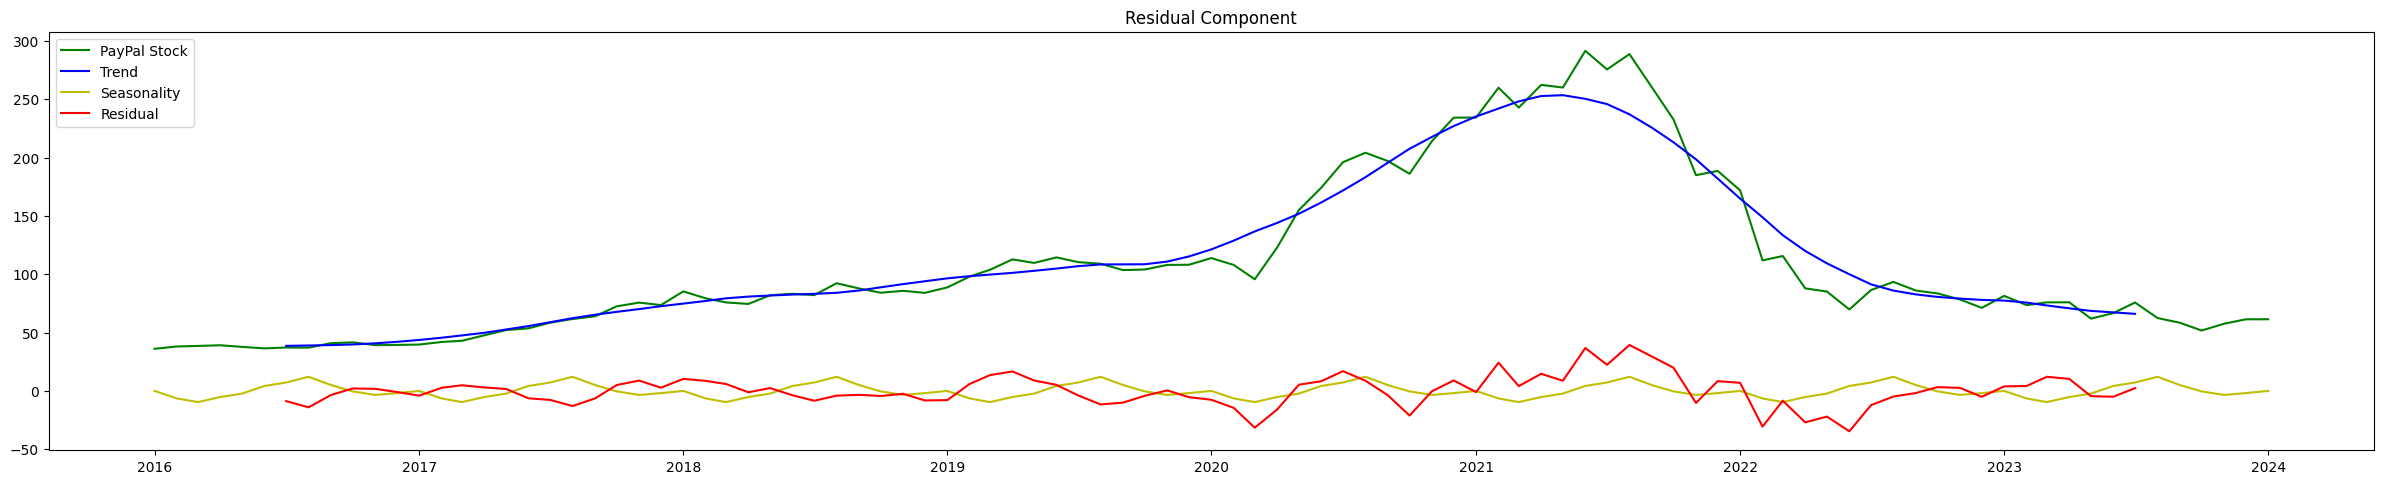

In [68]:
#Plotting the original time series with its seasonality, trend, and residual.
plt.figure(figsize=(30,25))
plt.subplot(4,1,1)
plt.plot(df1.index,df1['Adj Close'],label='PayPal Stock',color='g')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.plot(df1.index,trend,label='Trend',color='b')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.plot(df1.index,seasonal,label='Seasonality',color='y')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.plot(df1.index,residual,label='Residual',color='r')
plt.legend(loc='upper left')
plt.title('Residual Component')

In [69]:
#Created a function that checks the stationarity using Augmented Dickey-Ruller test
from statsmodels.tsa.stattools import adfuller
def check_stationarity(time_series):
  results = adfuller(time_series)
  print("ADF statistic:",results[0])
  print("p-value:",results[1])
  print("critical values:")
  for key,value in results[4].items():
    print(f"{key}:{value}")

In [70]:
#Perform differencing to make time series stationary
df1['Stock_diff'] = df1['Adj Close'] - df1['Adj Close'].shift(1)
df1.head()

,Adj Close,Stock_diff
Date,,
2016-01-01,36.139999,NaN
2016-02-01,38.139999,2.000000
2016-03-01,38.599998,0.459999
2016-04-01,39.180000,0.580002
2016-05-01,37.790001,-1.389999


In [71]:
#Check null values exist
df1.isnull().sum()

Adj Close     0
Stock_diff    1
dtype: int64

In [72]:
#Shape of df1 dataset
df1.shape

(97, 2)

In [73]:
#Dropping null values
df1.dropna(inplace=True)

In [74]:
#Shape of df1 dataset
df1.shape

(96, 2)

In [75]:
#Calculating the ADF statistic, p-value, and critical values to asses the significance of Stock price difference
check_stationarity(df1['Stock_diff'])

ADF statistic: -4.513919422528879
p-value: 0.00018556028507793186
critical values:
1%:-3.5019123847798657
5%:-2.892815255482889
10%:-2.583453861475781


• p-value is less than 0.5 so stock price difference is deemed as statistically significated. Hence, the null hypothesis is rejected.

• The ADF statistic is more negative than the critical values, which means that the null hypothesis is rejected and we can conclude that the time series is stationary.

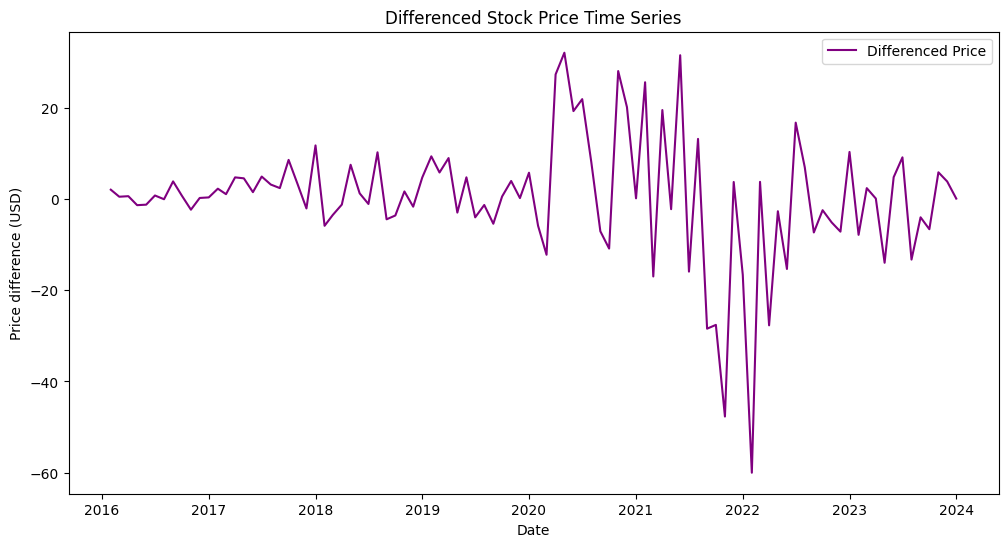

In [77]:
#Plotting differenced stock price time series
plt.figure(figsize=(12,6))
plt.plot(df1.index,df1['Stock_diff'],label='Differenced Price',color='Purple')
plt.xlabel('Date')
plt.ylabel('Price difference (USD)')
plt.title('Differenced Stock Price Time Series')
plt.legend()
plt.show()

• There is some fluctuation in the stock prices between the year 2016 to the year 2020.

• Then suddenly the fluctuations grew from the year 2020 to 2022 middle of the year then went back to normal fluctuations in stock prices.

• In the year 2021, the graph shows that there is a steep decline from the middle of the year.

In [ ]:
#MODELING

SARIMA (Seasonal Autoregressive Integrated Moving Average)

SARIMA is an extension of the ARIMA model that includes seasonal component.
The model is suitable for time series data that exhibit both trend and seasonality. It consists of 3 main components: Autoregression (AR), differencing (I) and moving average (MA).
It includes seasonal component (S) represented by seasonal_order

In [78]:
#Split the dataset into train and test sets
train_size = int(len(df1)*0.8)
train,test = df1.iloc[:train_size],df1.iloc[train_size:]

In [79]:
#Train dataset
train.head()

,Adj Close,Stock_diff
Date,,
2016-02-01,38.139999,2.000000
2016-03-01,38.599998,0.459999
2016-04-01,39.180000,0.580002
2016-05-01,37.790001,-1.389999
2016-06-01,36.509998,-1.280003


In [80]:
#Shape of train dataset
train.shape

(76, 2)

In [81]:
#Shape of test dataset
test.head()

,Adj Close,Stock_diff
Date,,
2022-06-01,69.839996,-15.370003
2022-07-01,86.529999,16.690003
2022-08-01,93.440002,6.910003
2022-09-01,86.070000,-7.370002
2022-10-01,83.580002,-2.489998


In [82]:
#Shape of test dataset
test.shape

(20, 2)

In [83]:
#SARIMA Model
#(1,1,1) order has the values of AR, I and MA.
#(1,1,1,12) seasonal order has 12 in range of 12 months
sarima_model = SARIMAX(train['Adj Close'],order=(1,1,1),seasonal_order=(1,1,1,12))
#trained model
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [84]:
#Forecast the future values
forecast = sarima_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

In [85]:
#Forecasted mean values
forecast_mean

2022-06-01     81.528069
2022-07-01     70.923162
2022-08-01     61.587241
2022-09-01     38.015882
2022-10-01     15.484437
2022-11-01      7.940575
2022-12-01      4.157248
2023-01-01     -7.583257
2023-02-01    -17.567117
2023-03-01    -36.756944
2023-04-01    -35.777814
2023-05-01    -39.420088
2023-06-01    -30.866253
2023-07-01    -43.130580
2023-08-01    -44.598178
2023-09-01    -69.688130
2023-10-01    -93.818914
2023-11-01   -114.996557
2023-12-01   -116.087281
2024-01-01   -129.385708
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
#Evaluation Metrics

#calculate mean squared error and root mean squared error to evaluate model
mse = mean_squared_error(test['Adj Close'],forecast_mean)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12001.117495974224


In [87]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 109.54961203023142


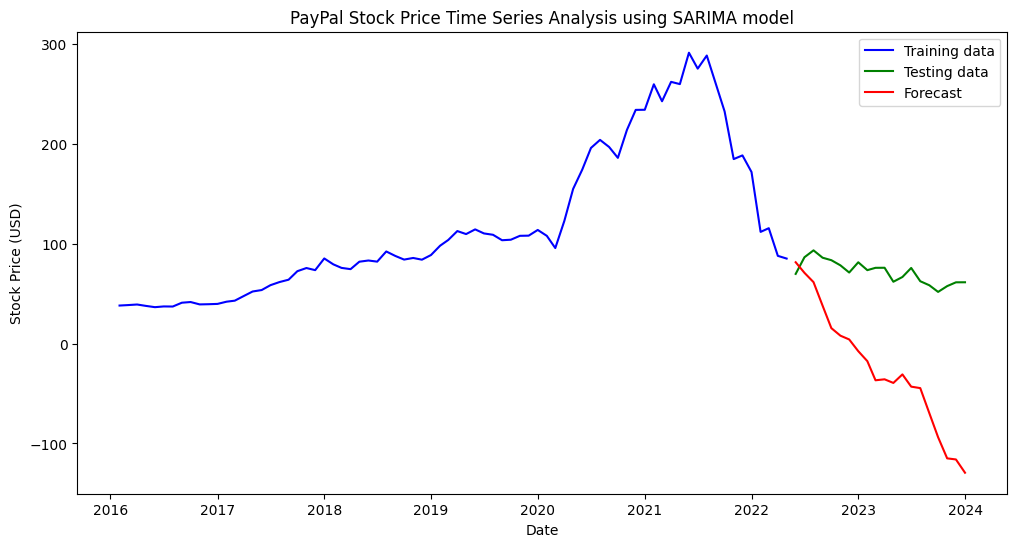

In [88]:
#Plotting PayPal Stock Price Time Series Analysis using SARIMA model
plt.figure(figsize=(12,6))
plt.plot(train.index,train['Adj Close'],label="Training data",color='b')
plt.plot(test.index,test['Adj Close'],label="Testing data",color='g')
plt.plot(test.index,forecast_mean,label="Forecast",color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('PayPal Stock Price Time Series Analysis using SARIMA model')
plt.legend()
plt.show()

• As per the forecasted mean values in the graph, there is a steady decline in the stock price.

• Thus, it is predicted that in the future the stock prices of PayPal is steadily going to decline.